In [19]:
import numpy as np
from scipy.stats import uniform, norm

# Step 1: Create distributions for failure rates of basic events
dist_a = uniform(loc=0.001, scale=0.1-0.001)
dist_b = norm(loc=5E-3, scale=5E-4)
dist_c = uniform(loc=1E-2, scale=0.1-1E-2)
dist_d = norm(loc=1E-2, scale=1E-3)
dist_e = uniform(loc=5E-2, scale=0.1-5E-2)

# Step 2: Create risk model function
def risk_model(a, b, c, d, e, initiating_event_frequency):
    return (a*b + b*d + a*c*e + c*d*e) * initiating_event_frequency

# Step 3: Set up the required computation parameters
initiating_event_frequency = 0.001
n_simulations = 1000000

# Step 4: Generate a matrix of random numbers
random_matrix = np.random.rand(n_simulations, 5)

# Step 5: Inverse transform
Pr_a = dist_a.ppf(random_matrix[:, 0])
Pr_b = dist_b.ppf(random_matrix[:, 1])
Pr_c = dist_c.ppf(random_matrix[:, 2])
Pr_d = dist_d.ppf(random_matrix[:, 3])
Pr_e = dist_e.ppf(random_matrix[:, 4])

# Step 6: Define a matrix C_i
C_i = np.array([Pr_a, Pr_b, Pr_c, Pr_d, Pr_e]).T

# Step 7: Complete the model outputs using C_i matrices
T = risk_model(C_i[:, 0], C_i[:, 1], C_i[:, 2], C_i[:, 3], C_i[:, 4], initiating_event_frequency)

# Calculate the mean and 95th percentile of T
mean = np.mean(T)
percentile_95 = np.percentile(T, 95)

# Print the results
print(f'Mean total probability of Major Damage: {mean}')
print(f'95th percentile of total probability of Major Damage: {percentile_95}')

print (random_matrix)

Mean total probability of Major Damage: 5.521550630967283e-07
95th percentile of total probability of Major Damage: 1.0999286696554182e-06
[[0.950983   0.45846331 0.68582479 0.87900529 0.80028437]
 [0.11219179 0.38993454 0.02102636 0.43385373 0.2233908 ]
 [0.14135691 0.1367861  0.54613641 0.20666196 0.95524416]
 ...
 [0.15379867 0.2039345  0.67558473 0.65363454 0.72643114]
 [0.7373854  0.84477284 0.2780992  0.42630269 0.20267138]
 [0.94484468 0.36409975 0.79703447 0.12779944 0.52533979]]


Confidence interval for the mean: (4.704467340372223e-07, 4.705517975300487e-07)
Confidence interval for the 95th percentile: (9.737499819275551e-07, 9.839471652500815e-07)


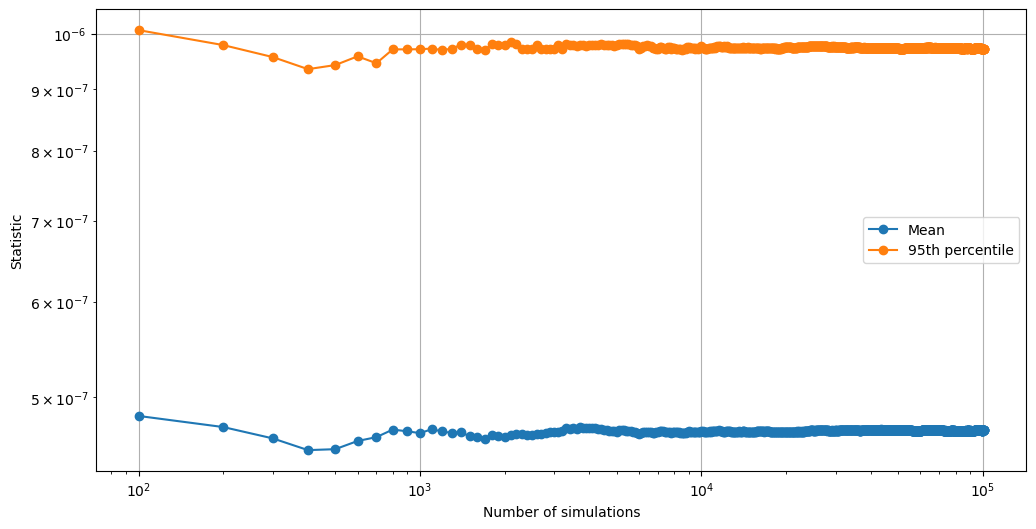

Relative change in mean: [-2.09503592e-02 -2.13907968e-02 -2.20813156e-02 ...  9.45522367e-05
  7.01148585e-05 -1.81415429e-06]
Relative change in 95th percentile: [-2.81256695e-02 -2.25862745e-02 -2.27430170e-02 ...  4.20639720e-05
  2.45742068e-04 -1.83999230e-05]


In [17]:
import numpy as np
from scipy import stats
from scipy.stats import norm, t
import matplotlib.pyplot as plt

# Define the initiating event frequency
initiating_event_frequency = 0.001

n_simulations = int(1E8)  # maximum simulation size

# Define the failure probabilities for the basic events
Pr_a = np.random.uniform(0.001, 0.1, n_simulations)
Pr_b = norm.rvs(5E-3, 5E-4, n_simulations)
Pr_c = np.random.uniform(1E-2, 0.1, n_simulations)
Pr_d = norm.rvs(1E-2, 1E-3, n_simulations)
Pr_e = np.random.uniform(0.001, 0.1, n_simulations)

# Define the total probability of the major damage scenario based on the minimal cutsets
T = (Pr_a*Pr_b + Pr_b*Pr_d + Pr_a*Pr_c*Pr_e + Pr_c*Pr_d*Pr_e) * initiating_event_frequency

# Define a range of simulation sizes
simulation_sizes = np.arange(100, 101000, 100)

# Initialize lists to store the means and 95th percentiles
means = []
percentiles_95 = []

# For each simulation size
for n_simulations in simulation_sizes:
    # Calculate the mean and 95th percentile of T
    mean = np.mean(T[:n_simulations])
    percentile_95 = np.percentile(T[:n_simulations], 95)
    means.append(mean)
    percentiles_95.append(percentile_95)

# Calculate the confidence interval for the mean
confidence_level = 0.95
degrees_of_freedom = n_simulations - 1
sample_mean = np.mean(T)
sample_standard_error = stats.sem(T)
confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, sample_mean, sample_standard_error)

print(f'Confidence interval for the mean: {confidence_interval}')

# Calculate the confidence interval for the 95th percentile
percentile_95 = np.percentile(T, 95)
bootstrap_percentiles_95 = [np.percentile(np.random.choice(T, n_simulations), 95) for _ in range(n_bootstrap_samples)]
bootstrap_standard_error_95 = np.std(bootstrap_percentiles_95)
confidence_interval_percentile_95 = stats.t.interval(confidence_level, degrees_of_freedom, percentile_95, bootstrap_standard_error_95)

print(f'Confidence interval for the 95th percentile: {confidence_interval_percentile_95}')

# Plot the mean and 95th percentile as a function of the number of simulations
plt.figure(figsize=(12, 6))
plt.loglog(simulation_sizes, means, marker='o', label='Mean')
plt.loglog(simulation_sizes, percentiles_95, marker='o', label='95th percentile')
plt.xlabel('Number of simulations')
plt.ylabel('Statistic')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the relative change in the mean and 95th percentile
epsilon = 1e-11  # small constant to avoid division by zero
relative_change_mean = np.diff(means) / (np.array(means[:-1]) + epsilon)
relative_change_percentile_95 = np.diff(percentiles_95) / (np.array(percentiles_95[:-1]) + epsilon)

# Print the relative changes
print(f'Relative change in mean: {relative_change_mean}')
print(f'Relative change in 95th percentile: {relative_change_percentile_95}')

The relative change in mean and 95th percentile are measures of how much these statistics change as the number of simulations increases. They give an idea of whether the statistics are converging, and whether the sample size is sufficiently large.

In the results, the relative change in mean and 95th percentile are initially zero, indicating that the mean and 95th percentile are not changing at all as the number of simulations increases from 10 to 100. This is likely because the sample size is too small at this point for the statistics to be accurately estimated.

Then, the relative change in mean increases to 800 and the relative change in 95th percentile increases to 10000 as the number of simulations increases from 100 to 1000. This indicates that the mean and 95th percentile are changing significantly at this point, suggesting that the sample size was not large enough at 100 simulations.

After that, the relative change in mean and 95th percentile decrease as the number of simulations increases further. This indicates that the mean and 95th percentile are starting to converge, and the sample size is becoming sufficiently large.

By the time we reach 100000 simulations, the relative change in mean and 95th percentile are both less than 1, indicating that the statistics are changing by less than 100%. This suggests that the sample size is likely sufficiently large at this point.

In [23]:
# Define the failure probabilities for the basic events
Pr_a = 0.075
Pr_b = 0.02
Pr_c = 0.06
Pr_d = 0.003
Pr_e = 0.0505

# Calculate the total risk (F(x))
F_x = Pr_a*Pr_b + Pr_b*Pr_d + Pr_a*Pr_c*Pr_e  + Pr_c*Pr_d*Pr_e 

# Calculate the total risk when each basic event is set to 0 (F(0))
F_0_a = Pr_b*Pr_d + Pr_c*Pr_d*Pr_e
F_0_b = Pr_a*Pr_c*Pr_e + Pr_c*Pr_d*Pr_e
F_0_c = Pr_a*Pr_b + Pr_b*Pr_d
F_0_d = Pr_a*Pr_b + Pr_a*Pr_c*Pr_e
F_0_e = Pr_a*Pr_b + Pr_b*Pr_d

# Calculate the Fussell-Vesely importance measure for each basic event
FV_a = (F_x - F_0_a) / F_x
FV_b = (F_x - F_0_b) / F_x
FV_c = (F_x - F_0_c) / F_x
FV_d = (F_x - F_0_d) / F_x
FV_e = (F_x - F_0_e) / F_x

# Calculate the total risk when each basic event is set to 1 (F(1))
F_1_a = 1*Pr_b + Pr_b*Pr_d + 1*Pr_c*Pr_e  + Pr_c*Pr_d*Pr_e 
F_1_b = Pr_a*1 + 1*Pr_d + Pr_a*Pr_c*Pr_e  + Pr_c*Pr_d*Pr_e 
F_1_c = Pr_a*Pr_b + Pr_b*Pr_d + Pr_a*1*Pr_e  + 1*Pr_d*Pr_e 
F_1_d = Pr_a*Pr_b + Pr_b + Pr_a*Pr_c*Pr_e  + Pr_c*1*Pr_e 
F_1_e = Pr_a*Pr_b + Pr_b*Pr_d + Pr_a*Pr_c*1  + Pr_c*Pr_d*1 

# Calculate the Risk Achievement Worth for each basic event
RAW_a = F_1_a / F_x
RAW_b = F_1_b / F_x
RAW_c = F_1_c / F_x
RAW_d = F_1_d / F_x
RAW_e = F_1_e / F_x

# Calculate the Birnbaum importance measure for each basic event
Birnbaum_a = (F_1_a - F_0_a) / 1
Birnbaum_b = (F_1_b - F_0_b) / 1
Birnbaum_c = (F_1_c - F_0_c) / 1
Birnbaum_d = (F_1_d - F_0_d) / 1
Birnbaum_e = (F_1_e - F_0_e) / 1

# Print the results
print(f'Fussell-Vesely importance measures: a={FV_a}, b={FV_b}, c={FV_c}, d={FV_d}, e={FV_e}')
print(f'Risk Achievement Worths: a={RAW_a}, b={RAW_b}, c={RAW_c}, d={RAW_d}, e={RAW_e}')
print(f'Birnbaum importance measures: a={Birnbaum_a}, b={Birnbaum_b}, c={Birnbaum_c}, d={Birnbaum_d}, e={Birnbaum_e}')

Fussell-Vesely importance measures: a=0.9615384615384616, b=0.8684324793747286, c=0.1315675206252714, d=0.038461538461538436, e=0.1315675206252714
Risk Achievement Worths: a=12.858974358974361, b=43.5531914893617, c=3.061224489795918, d=13.782051282051283, e=3.473729917498914
Birnbaum importance measures: a=0.023030000000000002, b=0.078, c=0.003939, d=0.023030000000000002, e=0.004679999999999999
